In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from datetime import datetime, date

In [2]:
train = pd.read_csv('berita_training.csv')
test = pd.read_csv('berita_testing.csv')
berita = pd.concat([train, test])

#**Import Data**

In [3]:
# data_cnn = cnn.loc[:, ['judul','narasi','label']]
# data_detik = detik.loc[:, ['judul','narasi','label']]
# data_suara = suara.loc[:, ['judul','narasi','label']]
# data_tribun = tribun.loc[:, ['judul','narasi','label']]
# data_kompas = kompas.loc[:, ['judul','narasi','label']]

# berita = pd.concat([data_cnn, data_detik, data_suara, data_tribun, data_kompas])

In [18]:
# cnn_aquaponik_rev = pd.read_csv('cnn_aquaponik_rev.csv')
# cnn_vertikultur = pd.read_csv('cnn_vertikultur.csv')
# cnn_hidroponik = pd.read_csv('data_cnn_hidroponik.csv')
# cnn_hidroponik = cnn_hidroponik.rename(columns = {'kategori':'label'})
# cnn = pd.concat([cnn_aquaponik_rev, cnn_vertikultur, cnn_hidroponik])

# detik_aquaverti = pd.read_csv('detik_aquaverti.csv', encoding='cp1252')
# detik_urbanfarming = pd.read_csv('detik_urbanfarming.csv', encoding='cp1252')
# detik_urbanfarming = detik_urbanfarming.rename(columns = {'title':'judul', 'text':'narasi'})
# detik = pd.concat([detik_aquaverti, detik_urbanfarming])

# kompas_aquaponik_rev = pd.read_csv('kompas_aquaponik_rev.csv', encoding="ISO-8859-1")
# kompas_hidroponik_rev = pd.read_csv('kompas_hidroponik rev.csv', encoding="ISO-8859-1")
# kompas_hidroponik_rev = kompas_hidroponik_rev.rename(columns = {'Label':'label'})
# kompas_medterpal = pd.read_csv('data_kompas_medterpal.csv', encoding="ISO-8859-1")
# kompas_medterpal = kompas_medterpal.rename(columns = {'kategori':'label'})
# kompas = pd.concat([kompas_aquaponik_rev, kompas_hidroponik_rev, kompas_medterpal])

# suara_aquaponik_rev = pd.read_csv('suara_aquaponik_rev.csv')
# suara_hidroponik_rev = pd.read_csv('suara_hidroponik rev.csv', encoding="ISO-8859-1")
# suara_hidroponik_rev = suara_hidroponik_rev.rename(columns = {'Label':'label'})
# suara_medterpal = pd.read_csv('data_suara_medterpal.csv')
# suara_medterpal = suara_medterpal.rename(columns = {'kategori':'label'})
# suara_urbanfarming2 = pd.read_csv('suara_urbanfarming2.csv')
# suara_vertikultur = pd.read_csv('suara_vertikultur.csv')
# suara = pd.concat([suara_aquaponik_rev, suara_hidroponik_rev, suara_medterpal, suara_urbanfarming2, suara_vertikultur])

# tribun_aquaponik_rev = pd.read_csv('tribun_aquaponik_rev.csv', encoding="ISO-8859-1")
# tribun_hidroponik = pd.read_csv('tribun_hidroponik.csv')
# tribun_mediaterpal_rev = pd.read_csv('tribun_mediaterpal rev.csv', encoding="ISO-8859-1")
# tribun_urbanfarming = pd.read_csv('tribun_urbanfarming.csv')
# #tribun_hidroponik = tribun_hidroponik.rename(columns = {'label':'label'}) pas digabung sama tribun hidroponik, kolom labelnya beda
# tribun = pd.concat([tribun_aquaponik_rev, tribun_mediaterpal_rev, tribun_urbanfarming])


In [19]:
# del berita['judul']

In [4]:
berita = berita.loc[:, ['narasi','label']]

In [5]:
berita

,narasi,label
0,"REPUBLIKA.CO.ID, TASIKMALAYA -- Petani Milenia...",1
1,Bandung - Sejak lama Kota Bandung dikenal seba...,1
2,"Jakarta, CNN Indonesia -- Bank BRI terus membe...",0
3,"Jakarta, CNN Indonesia -- BRI mewujudkan komit...",1
4,"Jakarta, CNN Indonesia -- Lingkungan yang bers...",1
...,...,...
404,\nDownload aplikasi detikcom\ndetiknetwork com...,NaN
405,"Jakarta - Jangan takut becek, ke pasar ini And...",NaN
406,\nDownload aplikasi detikcom\ndetiknetwork com...,NaN
407,Jakarta - PT Central Proteinaprima Tbk (CPRO) ...,NaN


In [6]:
berita.isna().sum()

narasi      4
label     460
dtype: int64

In [7]:
berita = berita.dropna(axis=0, subset=['narasi']).reset_index() #dihapus karena cuman 2 yg kosong
# train = train.dropna(axis=0, subset=['label']).reset_index()
berita.isna().sum()

index       0
narasi      0
label     456
dtype: int64

In [8]:
del berita['index']


In [9]:
berita

,narasi,label
0,"REPUBLIKA.CO.ID, TASIKMALAYA -- Petani Milenia...",1
1,Bandung - Sejak lama Kota Bandung dikenal seba...,1
2,"Jakarta, CNN Indonesia -- Bank BRI terus membe...",0
3,"Jakarta, CNN Indonesia -- BRI mewujudkan komit...",1
4,"Jakarta, CNN Indonesia -- Lingkungan yang bers...",1
...,...,...
1415,\nDownload aplikasi detikcom\ndetiknetwork com...,NaN
1416,"Jakarta - Jangan takut becek, ke pasar ini And...",NaN
1417,\nDownload aplikasi detikcom\ndetiknetwork com...,NaN
1418,Jakarta - PT Central Proteinaprima Tbk (CPRO) ...,NaN


# **Analisis Data Eksploratif**

**Memeriksa Null Value**

In [10]:
berita.head()

,narasi,label
0,"REPUBLIKA.CO.ID, TASIKMALAYA -- Petani Milenia...",1
1,Bandung - Sejak lama Kota Bandung dikenal seba...,1
2,"Jakarta, CNN Indonesia -- Bank BRI terus membe...",0
3,"Jakarta, CNN Indonesia -- BRI mewujudkan komit...",1
4,"Jakarta, CNN Indonesia -- Lingkungan yang bers...",1


In [11]:
berita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   narasi  1420 non-null   object
 1   label   964 non-null    object
dtypes: object(2)
memory usage: 22.3+ KB


**Distribusi Data**

Terdapat null values judul yang berjumlah 8

In [12]:
berita['label'].value_counts()

0                          595
1                          366
 CNN Indonesia | Senin       1
 CNN Indonesia | Selasa      1
 CNN Indonesia | Sabtu       1
Name: label, dtype: int64

In [13]:
berita['label'][51]

' CNN Indonesia | Selasa'

In [14]:
# df = df.drop([2])

In [15]:
for i in range(964):
    if berita['label'][i]!='1':
        if berita['label'][i]!='0':
            if berita['label'][i]!='nan':
                print(i)
#                     berita = berita.drop(i)
                    
#             df = df.drop([i])
#26,49,51

26
49
51
368
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835


In [16]:
berita = berita.drop(26)
berita = berita.drop(49)
berita = berita.drop(51)

In [17]:
berita['label'].value_counts()

0    595
1    366
Name: label, dtype: int64

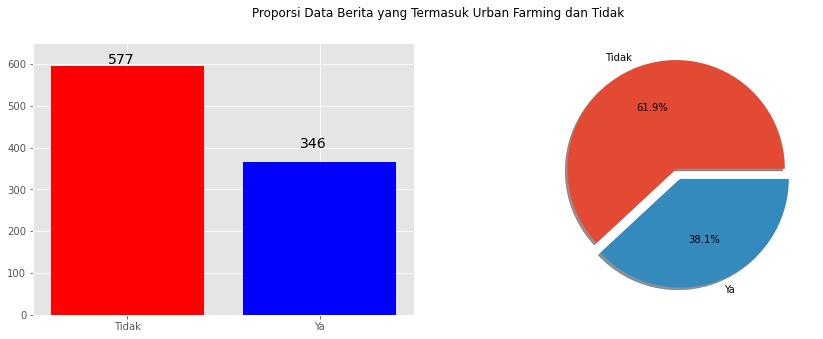

In [18]:
#Label distribution pada data train
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.bar(['Tidak','Ya'], berita['label'].value_counts(), color = ['r','b'])
ax2.pie(berita['label'].value_counts(), labels=['Tidak','Ya'], autopct='%1.1f%%', shadow=True, explode=(0.1, 0))

ax1.text(x=-0.1, y=600, s='577', fontsize=14)
ax1.text(x=0.9, y=400, s='346', fontsize=14)

ax1.set_ylim(top=650)

fig.suptitle('Proporsi Data Berita yang Termasuk Urban Farming dan Tidak')
plt.show()

37,5% dari data latih merupakan data dengan label 1 atau , urban farming dan 62,5% merupakan data dengan label 0 atau bukan urban farming.

**Emoji detection**

In [19]:
import string
punct = set(string.punctuation)
print(punct)

{')', '|', '?', ']', '_', '"', '@', '~', "'", '#', '*', '}', '(', '+', '&', '.', '[', ':', '-', '!', '\\', '$', '`', '=', '{', '/', ',', '>', '%', '^', ';', '<'}


In [20]:
emoji = set()
for s in berita['narasi'].fillna('').astype(str):
    for c in s:
        if c.isdigit() or c.isalpha() or c.isalnum() or c.isspace() or c in punct:
            continue
        emoji.add(c)
        
print(''.join(emoji))

**Dowload Stopword**

#Data Cleaning

Data Cleaning adalah proses mendeteksi dan memperbaiki catatan yang korup, tidak akurat,atau tidak relevan dari data, kemudian mengganti, memodifikasi, atau menghapus data yang kotor tersebut. 

In [21]:
berita['narasi']=berita['narasi'].apply(str)

**Remove URL**

In [22]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)

'New competition launched :'

In [23]:
berita['narasi'] = berita['narasi'].apply(lambda x : remove_URL(x))

**Remove Emoji**

In [24]:
import string
punct = set(string.punctuation)
print(punct)

{')', '|', '?', ']', '_', '"', '@', '~', "'", '#', '*', '}', '(', '+', '&', '.', '[', ':', '-', '!', '\\', '$', '`', '=', '{', '/', ',', '>', '%', '^', ';', '<'}


In [25]:
emoji = set()
symbol = 'ðŸ˜â\x81£â\x81£'
for s in berita['narasi'].fillna('').astype(str):
    for c in s:
        if c.isdigit() or c.isalpha() or c.isalnum() or c.isspace() or c in punct:
            continue
        emoji.add(c)

for s in symbol:
  emoji.add(s)

print(''.join(emoji))

˜Ÿ£ðâ


In [26]:
def remove_emoji(text):
  temp = ''
  for c in text:
    if c not in emoji:
      temp += c
  
  return temp
  
remove_emoji('Semainya satu, tumbuhnya dua.. ðŸ˜…â£â£ Kalo dijual perpohon bisa menang banyak ini ðŸ˜ðŸ˜â£.â£.â£.#simpleplanthidroponik #simpleplantbyyuka #simpleplant #selada #seladakeriting #seladahidroponik #seladahijau #seladabatavia #sayuranhijau #sayuranhidroponik #sayursehat #sayuran #sayursegar #tanpatanah #belajarnanam #belajarhidroponik #belajarnanamsayur #hidroponiksamarinda #hidroponiksayuran #hidroponiksederhana #hidroponiksayur #hidroponikpemula #hidroponik #hidroponikkaltim #hidroponikindonesia')

'Semainya satu, tumbuhnya dua.. … Kalo dijual perpohon bisa menang banyak ini ...#simpleplanthidroponik #simpleplantbyyuka #simpleplant #selada #seladakeriting #seladahidroponik #seladahijau #seladabatavia #sayuranhijau #sayuranhidroponik #sayursehat #sayuran #sayursegar #tanpatanah #belajarnanam #belajarhidroponik #belajarnanamsayur #hidroponiksamarinda #hidroponiksayuran #hidroponiksederhana #hidroponiksayur #hidroponikpemula #hidroponik #hidroponikkaltim #hidroponikindonesia'

In [27]:
berita['narasi'] = berita['narasi'].apply(lambda x : remove_emoji(x))

**Remove Hastag**

In [28]:
#https://ichi.pro/id/membersihkan-data-teks-dengan-python-200778039524214

def remove_hastag(x):
  x = re.sub(r'#\S+', ' ', x)
  return x

print(remove_hastag('kalo dijual perpohon...#simpleplanthidroponik #simpleplantbyyuka #simpleplant #selada'))

kalo dijual perpohon...       


In [29]:
berita['narasi'] = berita['narasi'].apply(lambda x : remove_hastag(x))

**Remove Punctuation**

In [30]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [31]:
berita['narasi'] = berita['narasi'].apply(lambda x : remove_punct(x))

**Make Lower**

In [32]:
berita['narasi'] = berita['narasi'].apply(lambda x : x.lower())

In [33]:
berita = berita.drop_duplicates(subset=['narasi']).reset_index()
del berita['index']
berita

,narasi,label
0,republikacoid tasikmalaya petani milenial tas...,1
1,bandung sejak lama kota bandung dikenal sebag...,1
2,jakarta cnn indonesia bank bri terus memberik...,0
3,jakarta cnn indonesia bri mewujudkan komitmen...,1
4,jakarta cnn indonesia lingkungan yang bersih ...,1
...,...,...
1289,jakarta di indonesia belum banyak yang mengen...,NaN
1290,\ndownload aplikasi detikcom\ndetiknetwork com...,NaN
1291,jakarta jangan takut becek ke pasar ini anda ...,NaN
1292,jakarta pt central proteinaprima tbk cpro tel...,NaN


**Download stopword**

#Data Preprocessing

Natural Language Toolkit, atau lebih umum NLTK, adalah serangkaian libraries dan program untuk pemrosesan bahasa alami simbolik dan statistik untuk bahasa Inggris yang ditulis dalam bahasa pemrograman Python.

In [34]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words(['indonesian','english'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer #TfidfVectorizer adalah metode untuk mengubah data teks menjadi vektor karena model hanya dapat memproses data numerik.
import string
ps = nltk.PorterStemmer()

**Clean text disini mencakup tokenisasi dan stemming kata yang bukan stopword**

In [36]:
def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [ps.stem(word) for word in tokens if word not in stopword]
  return text

**Mengubah Kata menjadi Vektor**

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

c_vect = TfidfVectorizer(analyzer=clean_text)
x_vect2 = c_vect.fit_transform(berita['narasi'])

In [38]:
a = pd.DataFrame(x_vect2.toarray())

x = a
y = berita['label']

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(x, x))

[[1.         0.01576306 0.01592641 ... 0.01238602 0.00112448 0.00886223]
 [0.01576306 1.         0.02663134 ... 0.0239086  0.02009046 0.04136446]
 [0.01592641 0.02663134 1.         ... 0.05700536 0.01879371 0.00664963]
 ...
 [0.01238602 0.0239086  0.05700536 ... 1.         0.01433692 0.0158861 ]
 [0.00112448 0.02009046 0.01879371 ... 0.01433692 1.         0.03887922]
 [0.00886223 0.04136446 0.00664963 ... 0.0158861  0.03887922 1.        ]]


In [40]:
a = cosine_similarity(x, x)

In [125]:
a.shape

(1294, 1294)

In [42]:
count=0
list_x=[]
for x in range(1294):
    for i in range(1294):
        if x!=i:
            if a[x][i] > 0.6:
                list_x.append(x)
#                 count +=1

list_x
y = list(dict.fromkeys(list_x))
# print('ketemu di : ',y)       
# print('count: ', count)

In [43]:
df = berita.copy()

In [44]:
count=0
for i in y:
    df =df.drop(i)
    count +=1
print('count: ', count)

count:  340


In [45]:
df

,narasi,label
4,jakarta cnn indonesia lingkungan yang bersih ...,1
6,jakarta cnn indonesia di ujung jalan tongkol ...,0
7,jakarta cnn indonesia panitia khusus pansus b...,0
8,jakarta cnn indonesia dinas ketahanan pangan ...,1
9,jakarta cnn indonesia memperingati hari pohon...,1
...,...,...
1289,jakarta di indonesia belum banyak yang mengen...,NaN
1290,\ndownload aplikasi detikcom\ndetiknetwork com...,NaN
1291,jakarta jangan takut becek ke pasar ini anda ...,NaN
1292,jakarta pt central proteinaprima tbk cpro tel...,NaN


In [46]:
df = df.reset_index()
del df['index']
df

,narasi,label
0,jakarta cnn indonesia lingkungan yang bersih ...,1
1,jakarta cnn indonesia di ujung jalan tongkol ...,0
2,jakarta cnn indonesia panitia khusus pansus b...,0
3,jakarta cnn indonesia dinas ketahanan pangan ...,1
4,jakarta cnn indonesia memperingati hari pohon...,1
...,...,...
949,jakarta di indonesia belum banyak yang mengen...,NaN
950,\ndownload aplikasi detikcom\ndetiknetwork com...,NaN
951,jakarta jangan takut becek ke pasar ini anda ...,NaN
952,jakarta pt central proteinaprima tbk cpro tel...,NaN


# Preprocessing Ulang

In [47]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words(['indonesian','english'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

c_vect = TfidfVectorizer(analyzer=clean_text)
x_vect2 = c_vect.fit_transform(df['narasi'])

In [51]:
data['label'] = df['label']
data

,0,1,2,3,4,5,6,7,8,9,...,25936,25937,25938,25939,25940,25941,25942,25943,25944,label
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070148,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,0.009892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
950,0.116809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
951,0.010284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
952,0.023134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [63]:
data

,0,1,2,3,4,5,6,7,8,9,...,25936,25937,25938,25939,25940,25941,25942,25943,25944,label
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070148,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,0.009892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
950,0.116809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
951,0.010284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
952,0.023134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [66]:
data.iloc[953]

0        0.026717
1             0.0
2             0.0
3             0.0
4             0.0
           ...   
25941         0.0
25942         0.0
25943         0.0
25944         0.0
label         NaN
Name: 953, Length: 25946, dtype: object

In [69]:
data_test = pd.DataFrame()

In [70]:
list_test = []
for i in range(954):
    if data['label'][i]!='1':
        if data['label'][i]!='0':
            data_test = data_test.append(data.iloc[i])

In [71]:
data_test = data_test.reset_index()
del data_test['index']
data_test

,0,1,2,3,4,5,6,7,8,9,...,25936,25937,25938,25939,25940,25941,25942,25943,25944,label
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.009892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
311,0.116809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
312,0.010284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
313,0.023134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [57]:
data_train = data.dropna(axis=0, subset=['label']).reset_index()
del data_train['index']
data_train

,0,1,2,3,4,5,6,7,8,9,...,25936,25937,25938,25939,25940,25941,25942,25943,25944,label
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070148,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
635,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
636,0.014465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
637,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [72]:
c = data_train.copy()

In [74]:
y = c['label']

In [73]:
x = c.drop(columns=['label'])

#Build Model

**Model terbaik adalah Random Forest dgn f1 score 0,825. jika model-model lain dirasa lama runningnya bisa langsung ke model Random Forest.**

In [78]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=1, stratify=y)

In [79]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

##**1. Random Forest Classifier**

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

pred_rf = rf.predict(X_test)
pred_rf_score = accuracy_score(Y_test, pred_rf)
print('accuracy_score : ', pred_rf_score)

accuracy_score :  0.8828125


In [81]:
confusion_matrix(Y_test, pred_rf)

array([[72,  7],
       [ 8, 41]], dtype=int64)

In [82]:
print(classification_report(Y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        79
           1       0.85      0.84      0.85        49

    accuracy                           0.88       128
   macro avg       0.88      0.87      0.88       128
weighted avg       0.88      0.88      0.88       128



In [83]:
pred_rf_train = rf.predict(X_train)
train_rf_score = accuracy_score(Y_train, pred_rf_train)
print('accuracy_score train: ', train_rf_score)

accuracy_score train:  1.0


##**2. KNN**

In [84]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

pred_knn = model_knn.predict(X_test)
pred_knn_score = accuracy_score(Y_test, pred_knn)
print('accuracy_score test: ', pred_knn_score)

accuracy_score test:  0.765625


In [85]:
confusion_matrix(Y_test, pred_knn)

array([[59, 20],
       [10, 39]], dtype=int64)

In [86]:
print(classification_report(Y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        79
           1       0.66      0.80      0.72        49

    accuracy                           0.77       128
   macro avg       0.76      0.77      0.76       128
weighted avg       0.78      0.77      0.77       128



In [87]:
pred_knn_train = model_knn.predict(X_train)
train_knn_score = accuracy_score(Y_train, pred_knn_train)
print('accuracy_score train: ', train_knn_score)

accuracy_score train:  0.8454011741682974


##**3 Logistic Regression**

In [88]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

pred_lr = lr.predict(X_test)
pred_lr_score = accuracy_score(Y_test, pred_lr)
print('accuracy_score test: ', pred_lr_score)

accuracy_score test:  0.875


In [89]:
confusion_matrix(Y_test, pred_lr)

array([[76,  3],
       [13, 36]], dtype=int64)

In [90]:
print(classification_report(Y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        79
           1       0.92      0.73      0.82        49

    accuracy                           0.88       128
   macro avg       0.89      0.85      0.86       128
weighted avg       0.88      0.88      0.87       128



In [91]:
pred_lr_train = lr.predict(X_train)
train_lr_score = f1_score(Y_train, pred_lr_train)
print('accuracy_score train: ', train_lr_score)

ValueError: pos_label=1 is not a valid label. It should be one of ['0', '1']

##**4. SVM**

In [92]:
from sklearn.svm import SVC 

svm_ = SVC()
svm_.fit(X_train, Y_train)

pred_svm = svm_.predict(X_test)
pred_svm_score = accuracy_score(Y_test, pred_svm)
print('accuracy_score test: ', pred_svm_score)

accuracy_score test:  0.890625


In [93]:
confusion_matrix(Y_test, pred_svm)

array([[76,  3],
       [11, 38]], dtype=int64)

In [94]:
print(classification_report(Y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        79
           1       0.93      0.78      0.84        49

    accuracy                           0.89       128
   macro avg       0.90      0.87      0.88       128
weighted avg       0.89      0.89      0.89       128



In [95]:
pred_svm_train = svm_.predict(X_train)
train_svm_score = accuracy_score(Y_train, pred_svm_train)
print('accuracy_score train: ', train_svm_score)

accuracy_score train:  1.0


##**5 Naive Bayes**

In [96]:
from sklearn.naive_bayes import GaussianNB

nv = GaussianNB()
nv.fit(X_train, Y_train)

pred_nb = nv.predict(X_test)
pred_nb_score = accuracy_score(Y_test, pred_nb)
print('accuracy_score test: ', pred_nb_score)

accuracy_score test:  0.7734375


In [97]:
confusion_matrix(Y_test, pred_nb)

array([[71,  8],
       [21, 28]], dtype=int64)

In [98]:
print(classification_report(Y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        79
           1       0.78      0.57      0.66        49

    accuracy                           0.77       128
   macro avg       0.77      0.74      0.74       128
weighted avg       0.77      0.77      0.76       128



In [99]:
pred_nb_train = nv.predict(X_train)
train_nb_score = accuracy_score(Y_train, pred_nb_train)
print('accuracy_score train: ', train_nb_score)

accuracy_score train:  0.9921722113502935


##**6. LightGBM Classifier**

In [100]:
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)

pred_gbm = clf.predict(X_test)
pred_lgbm_score = accuracy_score(Y_test, pred_gbm)
print('accuracy_score test: ', pred_lgbm_score)

accuracy_score test:  0.859375


In [101]:
confusion_matrix(Y_test, pred_gbm)

array([[70,  9],
       [ 9, 40]], dtype=int64)

In [102]:
print(classification_report(Y_test, pred_gbm))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        79
           1       0.82      0.82      0.82        49

    accuracy                           0.86       128
   macro avg       0.85      0.85      0.85       128
weighted avg       0.86      0.86      0.86       128



In [103]:
pred_gbm_train = clf.predict(X_train)
train_lgbm_score = accuracy_score(Y_train, pred_gbm_train)
print('accuracy_score train: ', train_lgbm_score)

accuracy_score train:  1.0


##**7. AdaBoost Classifier**

In [104]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab.fit(X_train,Y_train)

pred = ab.predict(X_test)
pred_ab_score = accuracy_score(Y_test, pred)
print('accuracy_score test: ', pred_ab_score)

accuracy_score test:  0.875


In [105]:
pred_ab_train = clf.predict(X_train)
train_ab_score = accuracy_score(Y_train, pred_ab_train)
print('accuracy_score train: ', train_ab_score)

accuracy_score train:  1.0


##**8. CatBoost**

In [106]:
# x_traincb = x_train.copy()
# x_traincb.columns = np.arange(1, len(x_traincb.columns)+1)

In [107]:
# from sklearn.model_selection import train_test_split  
# X_traincb, X_testcb, Y_traincb, Y_testcb = train_test_split(x_traincb, y_train, test_size = 0.25, random_state=1, stratify=y_train)

In [108]:
# from catboost import CatBoostClassifier

# model = CatBoostClassifier()
# model.fit(X_traincb, Y_traincb)

# pred_cb = model.predict(X_testcb)
# pred_cb_score = f1_score(Y_testcb, pred_cb)
# print('f1-score test: ', pred_cb_score)

In [ ]:
# pred_cb = model.predict(X_traincb)
# train_cb_score = f1_score(Y_traincb, pred_cb)
# print('f1-score train: ', train_cb_score)

In [ ]:
pred_cb_score = 0.9148128052088985
train_cb_score = 0.9480424442005123

overfit

##**9. Gradient Boosting**

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gb_ = GradientBoostingClassifier(random_state=21)
gb_.fit(X_train, Y_train)

pred_gb = gb_.predict(X_test)

pred_gb_score = accuracy_score(Y_test, pred_gb)
print('accuracy_score test: ', pred_gb_score)

accuracy_score test:  0.875


In [110]:
confusion_matrix(Y_test, pred_gb)

array([[71,  8],
       [ 8, 41]], dtype=int64)

In [111]:
print(classification_report(Y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        79
           1       0.84      0.84      0.84        49

    accuracy                           0.88       128
   macro avg       0.87      0.87      0.87       128
weighted avg       0.88      0.88      0.88       128



In [112]:
pred_train = gb_.predict(X_train)
train_gb_score = accuracy_score(Y_train, pred_train)
print('accuracy_score train: ', train_gb_score)

accuracy_score train:  1.0


# Decision Tree

In [113]:
from sklearn import metrics

In [114]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

dt_score = metrics.accuracy_score(Y_test,y_pred)
print('svm Accuracy Score : ' + str(dt_score))

svm_conf_mat = metrics.confusion_matrix(Y_test,y_pred)
print(svm_conf_mat)
print(classification_report(Y_test,y_pred))

svm Accuracy Score : 0.75
[[65 14]
 [18 31]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        79
           1       0.69      0.63      0.66        49

    accuracy                           0.75       128
   macro avg       0.74      0.73      0.73       128
weighted avg       0.75      0.75      0.75       128



## Naive Bayes Gaussian Model

In [115]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_test_GNB_model = gnb.predict(X_test)

nbg_score =  metrics.accuracy_score(Y_test,y_test_GNB_model)
print("GaussianNB Accuracy :", str(nbg_score))


gnb_conf_mat = metrics.confusion_matrix(Y_test,y_test_GNB_model)
print(gnb_conf_mat)
print(classification_report(Y_test,y_test_GNB_model))

GaussianNB Accuracy : 0.7734375
[[71  8]
 [21 28]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        79
           1       0.78      0.57      0.66        49

    accuracy                           0.77       128
   macro avg       0.77      0.74      0.74       128
weighted avg       0.77      0.77      0.76       128



## Gradient Boosting Model

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
model_predict = model.predict(X_test)

gb_score = metrics.accuracy_score(Y_test,model_predict)
print("Accuracy:", str(gb_score))

rfor_conf_mat = metrics.confusion_matrix(Y_test,model_predict)
print(rfor_conf_mat)
print(classification_report(Y_test,model_predict))

Accuracy: 0.875
[[71  8]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        79
           1       0.84      0.84      0.84        49

    accuracy                           0.88       128
   macro avg       0.87      0.87      0.87       128
weighted avg       0.88      0.88      0.88       128



## Multinomial NB Model

In [117]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,Y_train)
nb_predict = nb_classifier.predict(X_test)

nb_score = metrics.accuracy_score(Y_test,nb_predict)
print('Naive Bayes Accuracy Score : ' + str(nb_score))

nb_conf_mat = metrics.confusion_matrix(Y_test,nb_predict)
print(nb_conf_mat)
print(classification_report(Y_test,nb_predict))

Naive Bayes Accuracy Score : 0.890625
[[75  4]
 [10 39]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        79
           1       0.91      0.80      0.85        49

    accuracy                           0.89       128
   macro avg       0.89      0.87      0.88       128
weighted avg       0.89      0.89      0.89       128



#Prediksi Data Uji

In [118]:
x_test = data_test.drop(columns=['label'])

In [119]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,25935,25936,25937,25938,25939,25940,25941,25942,25943,25944
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.009892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,0.116809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312,0.010284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
313,0.023134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
nb_predict_test = nb_classifier.predict(x_test)

In [141]:
nb_predict_test

array(['1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0',
       '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1',
       '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1

In [142]:
data_hasil_test = pd.DataFrame(nb_predict_test)

In [143]:
data_hasil_test.to_excel('data_hasil_test.xlsx')